In [8]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from scipy.stats import truncnorm
import arviz as az
import matplotlib as mpl
sns.set_style('white')
sns.set_context('paper', font_scale=1.25)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h1>Prepare directories</h1>

In [2]:
import os

for directory in ['./output/', 
                  './output/figures/',
                  './output/tables',
                  './output/sims']:
    if not os.path.exists(directory):
        os.makedirs(directory)

In [6]:
replicate_vec(tau=.5, sigma=.3, n=48)

array(0.64247245)

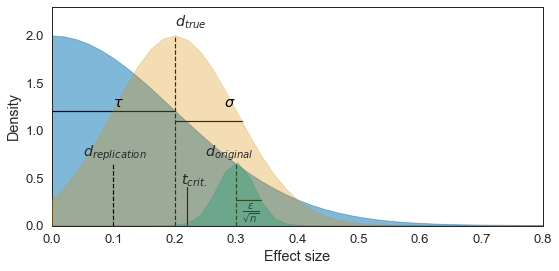

In [3]:
from src.plotting import fig_1
from src.theory import type_m_vec, type_s_vec, replicate_vec, publish_vec

#Move tau right (increase sigma, same for the green distribution)
fig = fig_1()

In [2]:
from src.plotting import fig_2,fig_3, SI_Theory_Fig1


(<Figure size 576x576 with 4 Axes>, <numpy.flatiter at 0x7ff9e8d30200>)

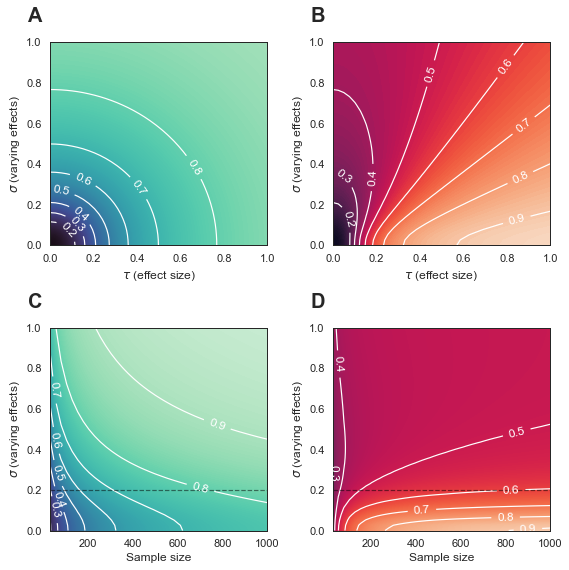

In [5]:
from src.plotting import fig_2,fig_3, SI_Theory_Fig1
fig_2()

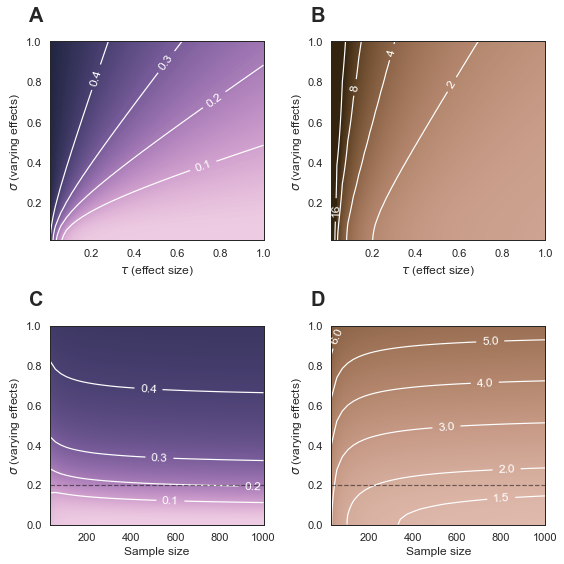

In [12]:
fig_3()

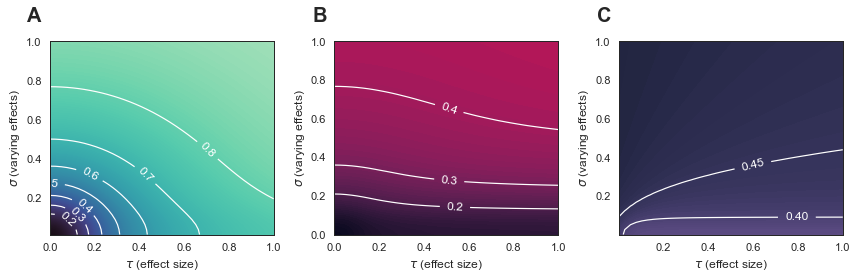

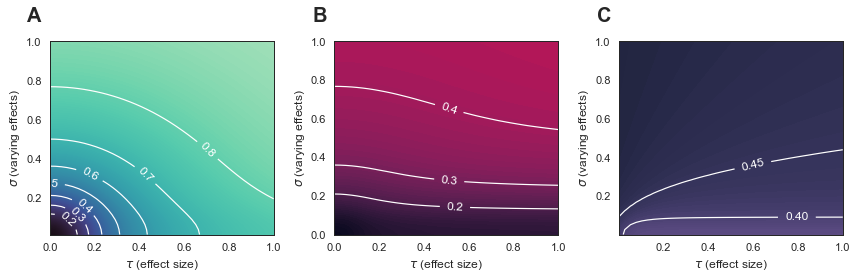

In [13]:
SI_Theory_Fig1(output='./output/figures/SIFigurePTrue10percentN100.png')

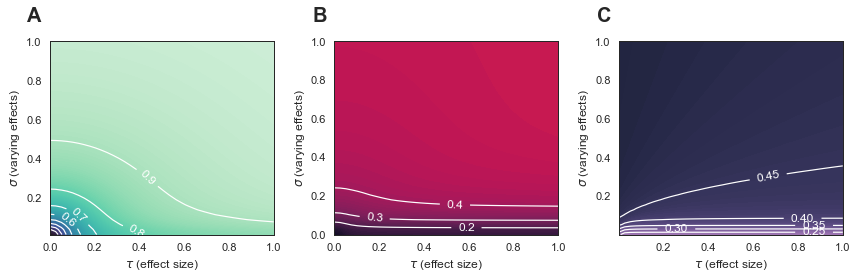

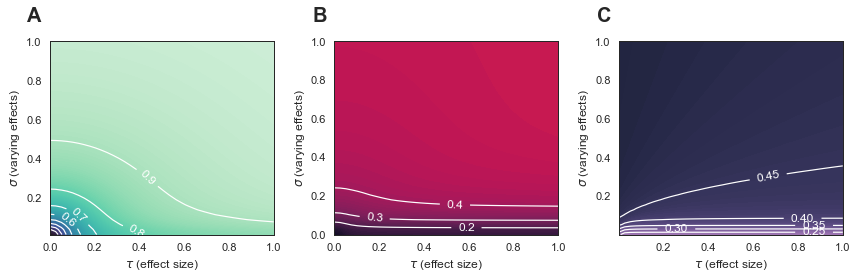

In [14]:
SI_Theory_Fig1(N=1000, output='./output/figures/SIFigurePTrue10percentN1000.png')

In [81]:
res =40
N = 20
x = np.linspace(0, 1.0, res)
y = np.linspace(0, 1.0, res)
X, Y = np.meshgrid(x, y)
Z1 = publish_vec(X, Y, 1, N, .05)
Z2 = type_s_vec(X, Y, 1, N, .05)
#Z = type_s_vec(X, Y, 1, N, .05)

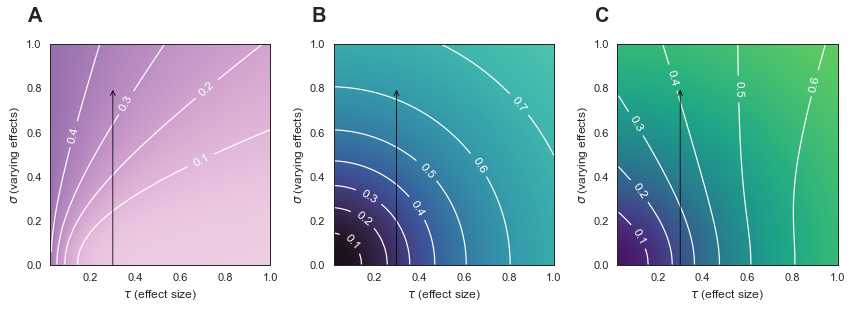

In [113]:
# Calculate mesh grid
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
sns.set_context('paper', font_scale=1.25)
sns.set_style('white')


axs1 = axs[2]

# Plot colormap
lls = np.linspace(.1, 1, 10)
Z = np.multiply(Z1, (1-Z2))

CS = axs1.contour(X, Y, Z, levels=lls, zorder=2, colors='white')
axs1.clabel(CS, colors='w', fontsize=12)  # contour line labels
levels = np.linspace(.0, 1, 1000)
CSF = axs1.contourf(X, Y, Z1, zorder=1, levels=levels,
                    cmap=sns.color_palette("viridis", as_cmap=True))
axs1.set_ylabel(r'$\sigma$' + ' (varying effects)')
axs1.set_xlabel(r'$\tau$' + ' (effect size)')
axs1.set_xlim(0.02,1.)
axs1.annotate( xy=(0.3, 0.8), text="",xytext=(0.30, -0.01),color='k', arrowprops=dict(arrowstyle="->", 
                                                                               color='k'))


axs1 = axs[1]
# Plot colormap
lls = np.linspace(.1, 1, 10)
Z = (Z1)
CS = axs1.contour(X, Y, Z, levels=lls, zorder=2, colors='white')
axs1.clabel(CS, colors='w', fontsize=12)  # contour line labels
levels = np.linspace(.0, 1, 1000)
CSF = axs1.contourf(X, Y, Z, zorder=1, levels=levels,
                    cmap=sns.color_palette("mako", as_cmap=True))
axs1.set_ylabel(r'$\sigma$' + ' (varying effects)')
axs1.set_xlabel(r'$\tau$' + ' (effect size)')
axs1.set_xlim(0.02,1.)
axs1.annotate( xy=(0.3, 0.8), text="",xytext=(0.30, -0.01),color='k', arrowprops=dict(arrowstyle="->", 
                                                                               color='k'))


axs1 = axs[0]
# Plot colormap
Z = Z2
lls = np.linspace(.1, 1, 10)
CS = axs1.contour(X, Y, Z, levels=lls, zorder=2, colors='white')
axs1.clabel(CS, colors='w', fontsize=12)  # contour line labels
levels = np.linspace(.0, 1, 1000)
CSF = axs1.contourf(X,Y, Z, zorder=1,
                            levels=levels, cmap=sns.color_palette("ch:start=2.8,rot=.3", as_cmap=True))
axs1.set_ylabel(r'$\sigma$' + ' (varying effects)')
axs1.set_xlabel(r'$\tau$' + ' (effect size)')
axs1.set_xlim(0.02,1.)
plt.tight_layout()
axs1.annotate( xy=(0.3, 0.8), text="",xytext=(0.30, -0.01),color='k', arrowprops=dict(arrowstyle="->", 
                                                                               color='k'))

axs = axs.flat
import string
for n, ax in enumerate(axs):
    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes,
            size=20, weight='bold')
        
plt.savefig('./SIPHack.png',dpi=300)